In [ ]:
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
import plotly.express as px;



In [ ]:
customer =  pd.read_csv('/content/Customers.csv')
Products = pd.read_csv('/content/Products.csv')
Transactions = pd.read_csv('/content/Transactions.csv')

In [ ]:
# Check the first few rows
print(customer.head())
print(Products.head())
print(Transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [ ]:
# Get basic info about the data
print(customer.info())
print(Products.info())
print(Transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [ ]:
# Convert date columns to datetime
customer['SignupDate'] = pd.to_datetime(customer['SignupDate'])
Transactions['TransactionDate'] = pd.to_datetime(Transactions['TransactionDate'])

In [ ]:
# Check for missing values
print(customer.isnull().sum())
print(Products.isnull().sum())
print(Transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


# **Analyze Customer Demographics: Region Distribution**

In [ ]:
# Region distribution
region_counts = customer['Region'].value_counts()
print("\nRegion Distribution:")
print(region_counts)


Region Distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


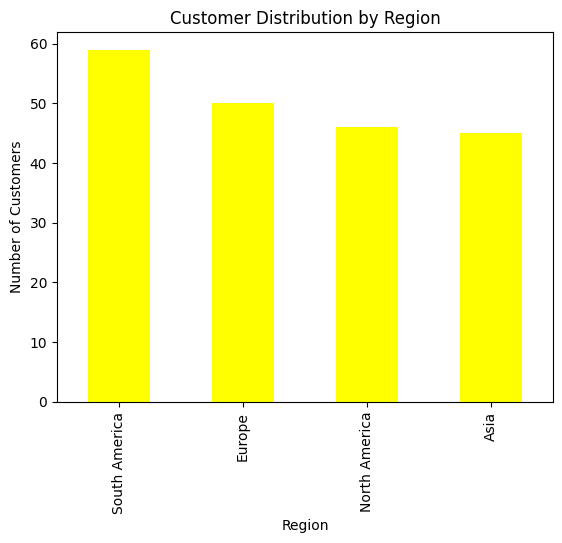

In [ ]:
# Visualization
region_counts.plot(kind='bar', title='Customer Distribution by Region', color='yellow')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

Analyze Product Categories: Popular Categories and Pricing **Trends**

In [ ]:
# Popular product categories
category_counts = Products['Category'].value_counts()
print("\nProduct Categories Distribution:")
print(category_counts)


Product Categories Distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


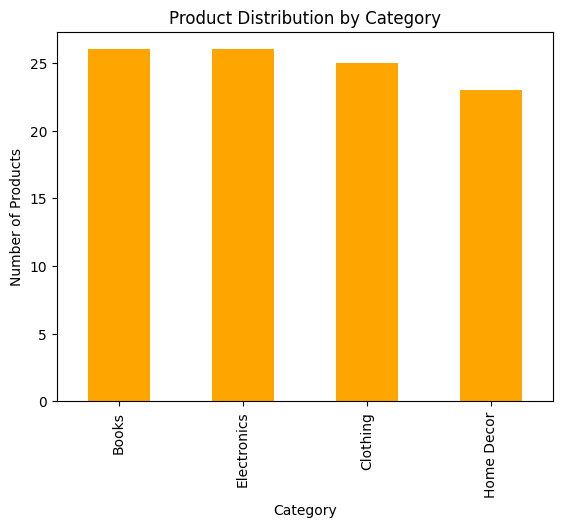

In [ ]:

category_counts.plot(kind='', title='Product Distribution by Category', color='orange')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

In [ ]:
# show Pricing trends #
print("\nProduct Price Summary:")
print(Products['Price'].describe())


Product Price Summary:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


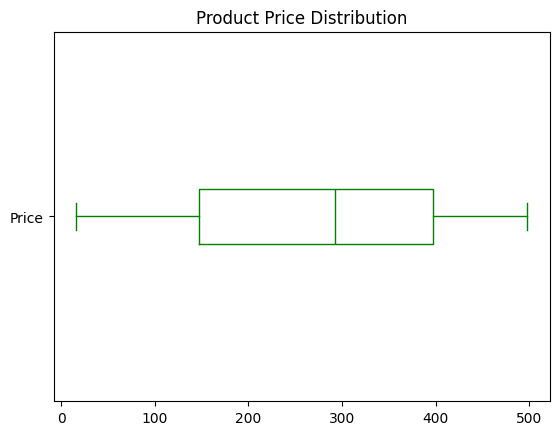

In [ ]:
#Visualize according price distribution
Products['Price'].plot(kind='box', title='Product Price Distribution', vert=False, color='green')
plt.show()

# **Analyze** 4 Transaction Trends: Monthly/Seasonal Patterns and Total Revenue

In [ ]:
# 1] Add month and year columns for analysis
Transactions['Month'] = Transactions['TransactionDate'].dt.month
Transactions['Year'] = Transactions['TransactionDate'].dt.year



Monthly Transaction Trends:
Year  Month
2023  12        3769.52
2024  1        66376.39
      2        51459.27
      3        47828.73
      4        57519.06
      5        64527.74
      6        48771.18
      7        71366.39
      8        63436.74
      9        70603.75
      10       47063.22
      11       38224.37
      12       59049.20
Name: TotalValue, dtype: float64


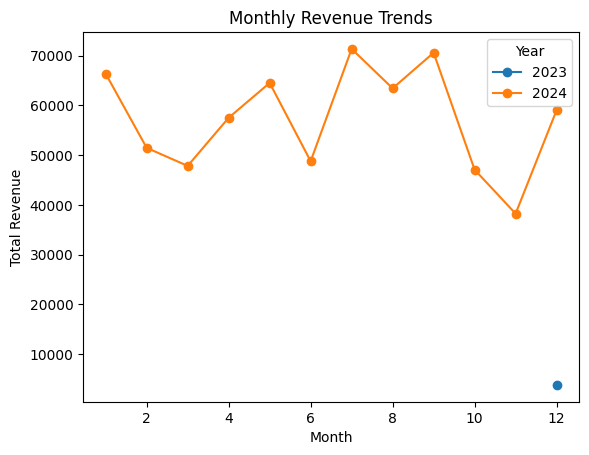


Total Revenue Generated: 689995.56


In [ ]:
#2] Monthly transaction trends
monthly_trends = Transactions.groupby(['Year', 'Month'])['TotalValue'].sum()
print("\nMonthly Transaction Trends:")
print(monthly_trends)

# 3] Visualization
monthly_trends.unstack(level=0).plot(kind='line', title='Monthly Revenue Trends', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Year')
plt.show()

# 4] Total revenue
total_revenue = Transactions['TotalValue'].sum()
print("\nTotal Revenue Generated:", total_revenue)

# 5)`Popular Product Categories`

In [ ]:
# Merge transactions with product details
merged_data = pd.merge(Transactions, Products, on='ProductID', how='inner')


In [ ]:
# Calculate total sales and transaction count by category
category_popularity = merged_data.groupby('Category').agg({
    'Quantity': 'sum',           # Total quantity sold
    'TotalValue': 'sum'          # Total revenue generated
}).sort_values(by='TotalValue', ascending=False)

print(category_popularity)

             Quantity  TotalValue
Category                         
Books             681   192147.47
Electronics       627   180783.50
Clothing          590   166170.66
Home Decor        639   150893.93


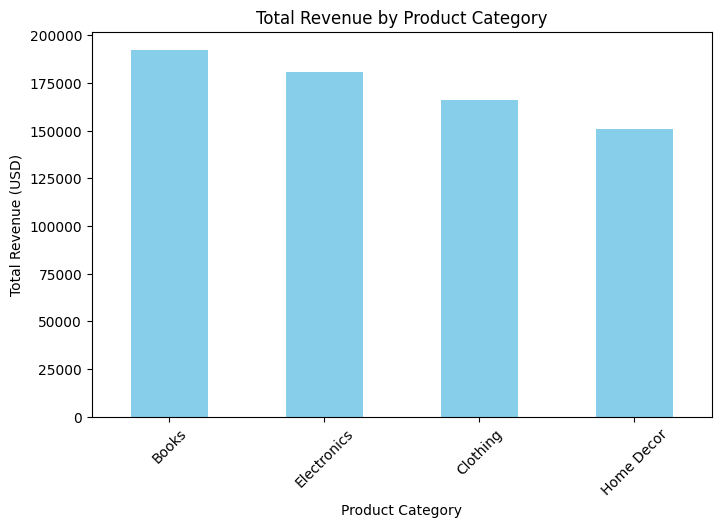

In [ ]:
# Bar chart for total revenue by category
category_popularity['TotalValue'].plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()